# Malaria Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import cv2

In [12]:
data_gen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

early_stop = EarlyStopping(monitor='val_loss',patience=2)

train = data_gen.flow_from_directory(directory='./cell_images/',
                                           target_size=(128,128),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

test = data_gen.flow_from_directory(directory='./cell_images/',
                                           target_size=(128,128),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [13]:
type(train)

keras.preprocessing.image.DirectoryIterator

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation="relu", input_shape=(128, 128, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation="sigmoid")])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit_generator(generator = train,
                             steps_per_epoch = len(train),
                              epochs =10,
                              validation_data = test,
                              validation_steps=len(test),
                             callbacks=[early_stop])


Epoch 1/10
1378/1378 [==============================] - 1451s 1s/step - loss: 0.5757 - accuracy: 0.7056 - val_loss: 1.0043 - val_accuracy: 0.7152
Epoch 2/10
1378/1378 [==============================] - 1427s 1s/step - loss: 0.3124 - accuracy: 0.8762 - val_loss: 0.5457 - val_accuracy: 0.7851
Epoch 3/10
1378/1378 [==============================] - 1472s 1s/step - loss: 0.2396 - accuracy: 0.9126 - val_loss: 0.3917 - val_accuracy: 0.8893
Epoch 4/10
1378/1378 [==============================] - 1384s 1s/step - loss: 0.1844 - accuracy: 0.9358 - val_loss: 0.5124 - val_accuracy: 0.9100
Epoch 5/10
1378/1378 [==============================] - 1324s 961ms/step - loss: 0.1777 - accuracy: 0.9393 - val_loss: 0.2519 - val_accuracy: 0.9209
Epoch 6/10
1378/1378 [==============================] - 1445s 1s/step - loss: 0.1578 - accuracy: 0.9432 - val_loss: 0.2933 - val_accuracy: 0.9214
Epoch 7/10
1378/1378 [==============================] - 1299s 943ms/step - loss: 0.1090 - accuracy: 0.9619 - val_loss: 0.

In [23]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

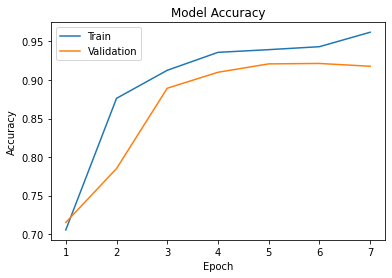

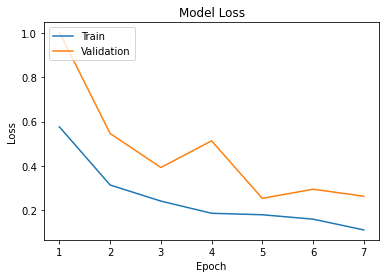

In [24]:
plotLearningCurve(history,7)